# Objective:
- The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 

# Exploratory Data Analysis (EDA):

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 2.	Check for missing values.
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Age (Numerical):
# Impute with median to reduce the effect of outliers.

In [8]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [9]:
# Cabin (Categorical, mostly missing):
# Drop this column (too much missing data).

In [10]:
train_df.drop('Cabin', axis=1, inplace=True)

In [11]:
#Embarked (Categorical):
# Impute with mode (most frequent value)

In [12]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [13]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
# Histograms 

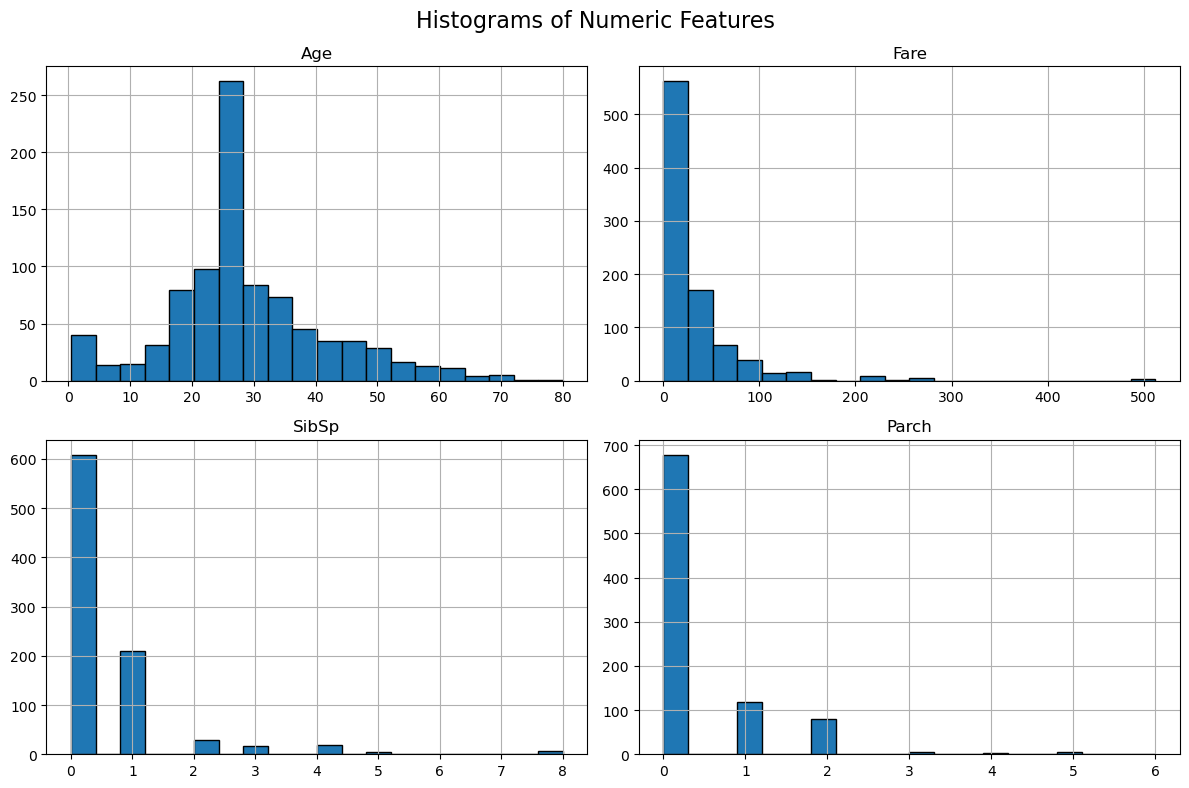

In [15]:
import matplotlib.pyplot as plt

# Select numerical columns
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Plot histograms
train_df[numeric_features].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

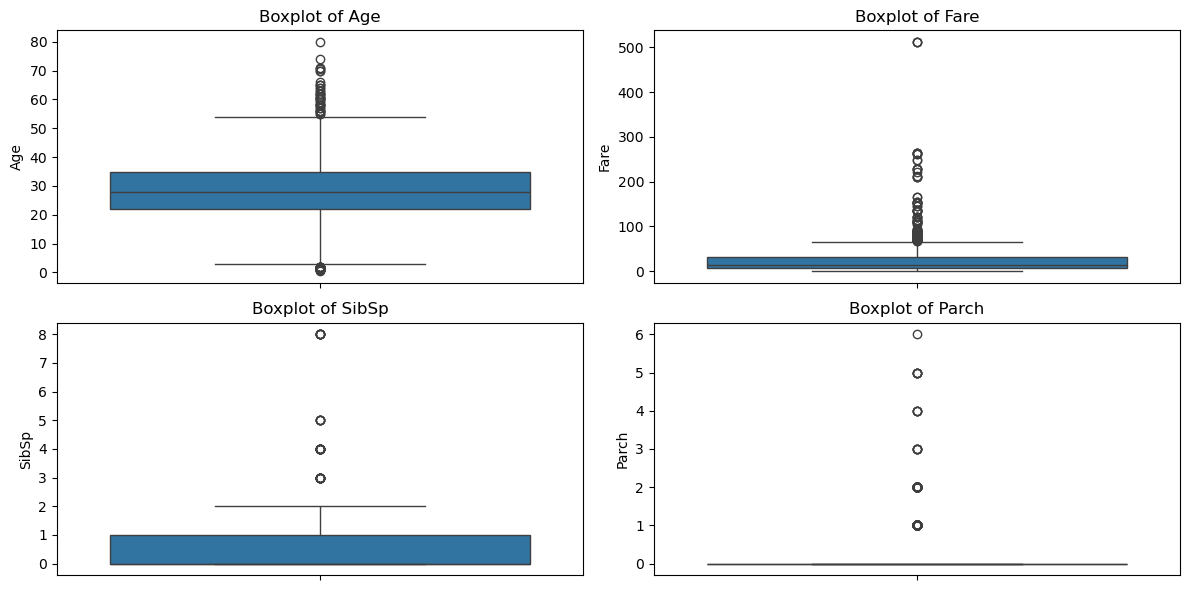

In [16]:
# Box Plots – Outlier Detection
import seaborn as sns

# Box plots for each numerical feature
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=train_df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [17]:
for col in numeric_features:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    train_df[col] = train_df[col].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

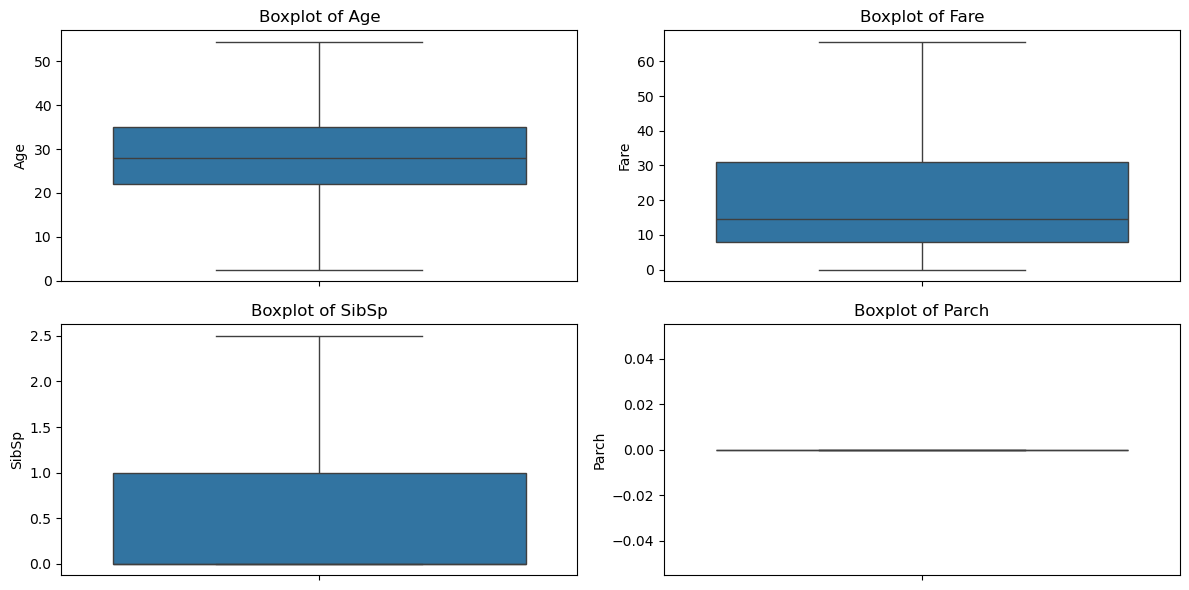

In [18]:
# Box plots for each numerical feature
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=train_df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Test Dataset

In [20]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
# Fill missing Age with median
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [22]:
# Fill missing Fare with median
test_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

In [23]:
# Fill missing Embarked with mode (though rare in test set)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

In [24]:
# Drop Cabin
#test_df.drop('Cabin')

# Bar Plots – Survival vs Categorical Features

In [26]:
# List of categorical features to analyze
categorical_features = ['Pclass', 'Sex', 'Embarked']

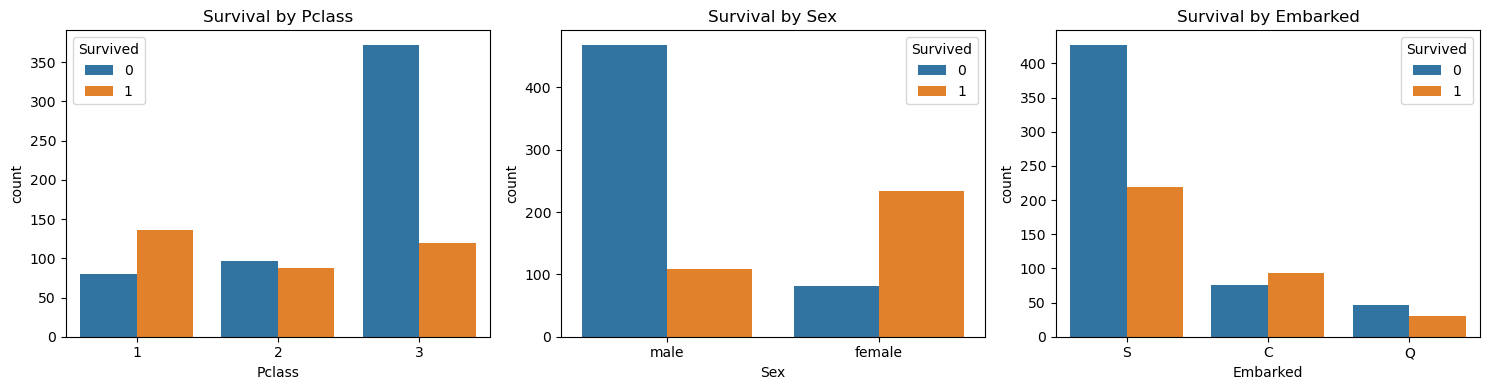

In [27]:
plt.figure(figsize=(15, 4))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=feature, hue='Survived', data=train_df)
    plt.title(f'Survival by {feature}')
plt.tight_layout()
plt.show()

# Scatter Plot

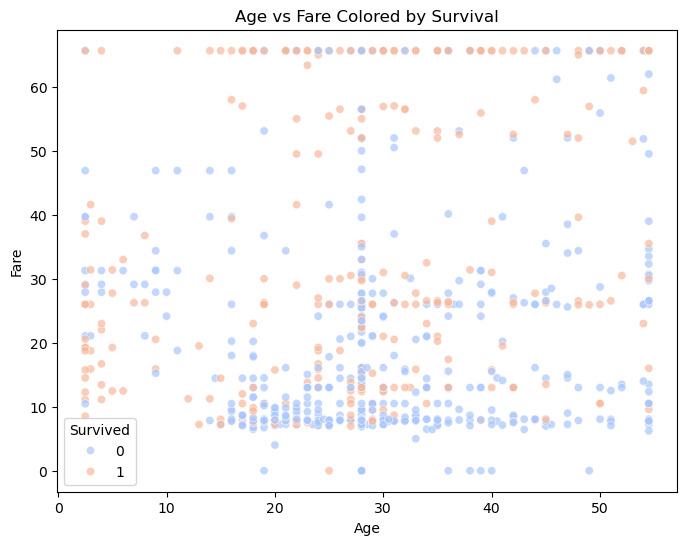

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df, palette='coolwarm', alpha=0.7)
plt.title("Age vs Fare Colored by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

### Categorical Columns to Encode
- 'Sex': Binary (Use Label Encoding)
- 'Embarked': Multiple categories ( Use One-Hot Encoding)
- Optionally drop 'Name', 'Ticket', 'PassengerId' since they don't carry predictive value.

In [31]:
from sklearn.preprocessing import LabelEncoder 
# Label encode 'Sex' (Male=1, Female=0)
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.fit_transform(test_df['Sex'])

In [32]:
# One-hot encode 'Embarked' and drop the first to avoid dummy variable trap
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

In [33]:
# Drop irrelevant columns
train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
# Display encoded DataFrame
print(train_df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    1  22.0    1.0    0.0   7.2500       False        True
1         1       1    0  38.0    1.0    0.0  65.6344       False       False
2         1       3    0  26.0    0.0    0.0   7.9250       False        True
3         1       1    0  35.0    1.0    0.0  53.1000       False        True
4         0       3    1  35.0    0.0    0.0   8.0500       False        True


# Building Predictive Models:

In [36]:
# Family size
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# IsAlone flag
test_df['IsAlone'] = 0
test_df.loc[test_df['FamilySize'] == 1, 'IsAlone'] = 1

# Binning Age and Fare
test_df['AgeBin'] = pd.qcut(test_df['Age'], 4, labels=False)
test_df['FareBin'] = pd.qcut(test_df['Fare'], 4, labels=False)

In [38]:
# Save PassengerId for submission
test_passenger_ids = test_df['PassengerId']

# Drop non-feature columns
test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [46]:
from sklearn.model_selection import train_test_split

# Define features and target
x = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Now do the lowercase split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [48]:
missing_cols = set(x_train.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

# Reorder columns
test_df = test_df[x_train.columns]

In [52]:
import lightgbm as lgb
import xgboost as xgb

In [54]:
# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [56]:
# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [60]:
# Predict
test_pred_lgb = lgb_model.predict(test_df)
test_pred_lgb

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
test_pred_xgb = xgb_model.predict(test_df)
test_pred_xgb

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
# LightGBM Submission
submission_lgb = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_pred_lgb
})
submission_lgb.to_csv("submission_lightgbm.csv", index=False)

# XGBoost Submission
submission_xgb = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_pred_xgb
})
submission_xgb.to_csv("submission_xgboost.csv", index=False)

## Hyperparameter Tuning – LightGBM

In [67]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for LightGBM
lgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
}

In [69]:
# Initialize model
lgb_clf = lgb.LGBMClassifier(random_state=42)

In [71]:
# GridSearch with 5-fold CV
lgb_grid = GridSearchCV(
    estimator=lgb_clf,
    param_grid=lgb_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [73]:
# Fit model
lgb_grid.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

,estimator,LGBMClassifie...ndom_state=42)
,param_grid,"{'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [77]:
# Best model
best_lgb = lgb_grid.best_estimator_
best_lgb

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,3
,learning_rate,0.05
,n_estimators,200
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [79]:
# Predict using tuned model
tuned_pred_lgb = best_lgb.predict(x_test)
tuned_pred_lgb

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

## Hyperparameter Tuning – XGBoost

In [82]:
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
}

In [84]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [86]:
xgb_grid = GridSearchCV(
    estimator=xgb_clf,
    param_grid=xgb_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [88]:
xgb_grid.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [90]:
# Best model
best_xgb = xgb_grid.best_estimator_
best_xgb

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [92]:
# Predict using tuned model
tuned_pred_xgb = best_xgb.predict(x_test)

### Evaluate Tuned Models

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, name):
    print(f"\n{name} Performance:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))

# Evaluate both
evaluate_model(y_test, tuned_pred_lgb, "Tuned LightGBM")
evaluate_model(y_test, tuned_pred_xgb, "Tuned XGBoost")


Tuned LightGBM Performance:
Accuracy : 0.7932960893854749
Precision: 0.7857142857142857
Recall   : 0.6376811594202898
F1 Score : 0.704

Tuned XGBoost Performance:
Accuracy : 0.8156424581005587
Precision: 0.8103448275862069
Recall   : 0.6811594202898551
F1 Score : 0.7401574803149606


# Interpretation
- XGBoost performed slightly better across all metrics, especially in recall and F1-score, which are crucial when predicting rare events (like survival).
- LightGBM was slightly faster to train and still performed competitively.
- If model performance is close, LightGBM may be preferred for speed; XGBoost if squeezing performance matters more.

- The goal was to evaluate and compare the performance of two gradient boosting algorithms — LightGBM and XGBoost — for predicting survival on the Titanic dataset.
- The dataset was preprocessed with missing value imputation, label encoding, feature engineering, and one-hot encoding.
- Models were trained on the same training data using GridSearchCV for hyperparameter tuning and 5-fold cross-validation.
- Evaluation metrics included Accuracy, Precision, Recall, and F1-score.